<a href="https://colab.research.google.com/github/aashirvad09/Covid-Data-Analysis2019/blob/main/Copy_of_Covid_Data_Analysis2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# ----------------------------------------------
# COVID INDIA DATA ANALYSIS -aashirvad-pandey
# ----------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Latest Covid-19 India Status.csv')
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,8397,479,7789,129,5.70,92.76,1.54,399001
1,Andhra Pradesh,2087879,10119,2063255,14505,0.48,98.82,0.69,91702478
2,Arunachal Pradesh,56010,665,55063,282,1.19,98.31,0.50,1711947
3,Assam,635050,13139,615722,6189,2.07,96.96,0.97,35998752
4,Bihar,762458,28660,721684,12114,3.76,94.65,1.59,128500364


In [ ]:

print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
 8   Population       36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB
None
        Total Cases         Active    Discharged         Deaths  Active Ratio  \
count  3.600000e+01      36.000000  3.600000e+01      36.000000     36.000000   
mean   1.008831e+06   31042.527778  9.643156e+05   13473.194444      3.151944   
std    1.512173e+06   47482.150114  1.448209e+06   25045.352736      1.977721   
m

In [ ]:
print("Total States in Dataset:", df['State/UTs'].nunique())

Total States in Dataset: 36


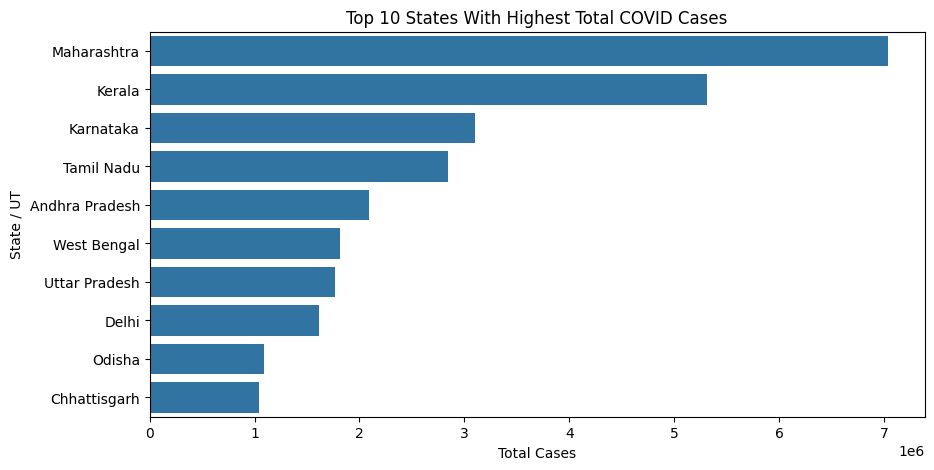

In [ ]:
top_cases = df.sort_values("Total Cases", ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x="Total Cases", y="State/UTs", data=top_cases)
plt.title("Top 10 States With Highest Total COVID Cases")
plt.xlabel("Total Cases")
plt.ylabel("State / UT")
plt.show()

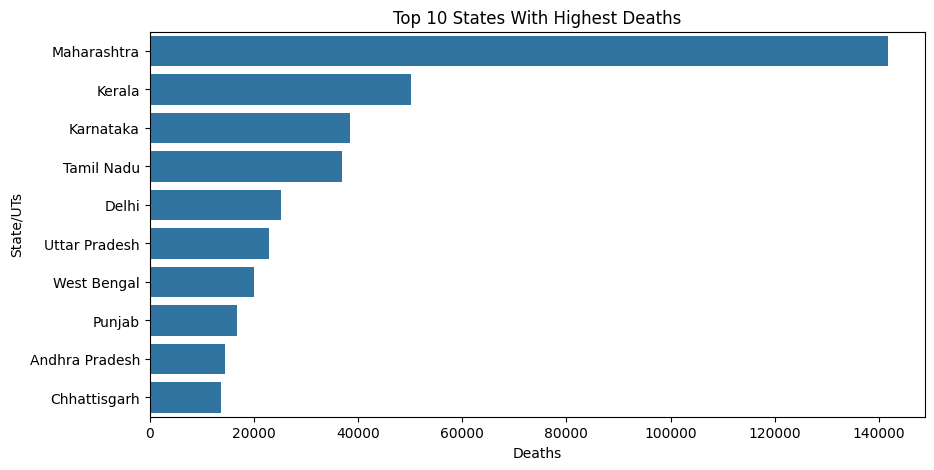

In [ ]:

top_deaths = df.sort_values("Deaths", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x="Deaths", y="State/UTs", data=top_deaths)
plt.title("Top 10 States With Highest Deaths")
plt.xlabel("Deaths")
plt.ylabel("State/UTs")
plt.show()

In [ ]:
df["Recovery_Rate"] = (df["Discharged"] / df["Total Cases"]) * 100
df["Death_Rate"] = (df["Deaths"] / df["Total Cases"]) * 100

df[["State/UTs", "Total Cases", "Discharged", "Deaths", "Recovery_Rate", "Death_Rate"]].head()

,State/UTs,Total Cases,Discharged,Deaths,Recovery_Rate,Death_Rate
0,Andaman and Nicobar,8397,7789,129,92.759319,1.536263
1,Andhra Pradesh,2087879,2063255,14505,98.820621,0.694724
2,Arunachal Pradesh,56010,55063,282,98.309230,0.503482
3,Assam,635050,615722,6189,96.956460,0.974569
4,Bihar,762458,721684,12114,94.652296,1.588809


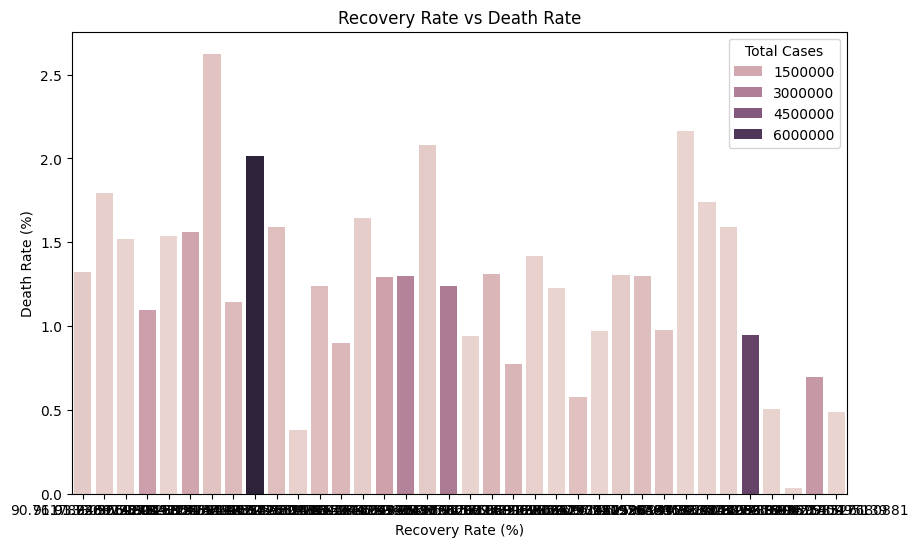

In [ ]:

plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Recovery_Rate", y="Death_Rate", hue="Total Cases")
plt.title("Recovery Rate vs Death Rate")
plt.xlabel("Recovery Rate (%)")
plt.ylabel("Death Rate (%)")
plt.show()

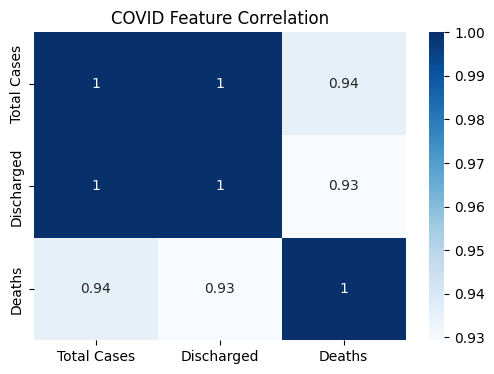

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["Total Cases", "Discharged", "Deaths"]].corr(), annot=True, cmap="Blues")
plt.title("COVID Feature Correlation")
plt.show()

In [ ]:
top_recovery = df.sort_values("Recovery_Rate", ascending=False).head(10)
top_recovery[["State/UTs", "Recovery_Rate"]]

,State/UTs,Recovery_Rate
18,Lakshadweep,99.367513
1,Andhra Pradesh,98.820621
7,Dadra and Nagar Haveli and Daman and Diu,98.636699
2,Arunachal Pradesh,98.309230
16,Kerala,98.016524
21,Manipur,97.828526
22,Meghalaya,97.442455
24,Nagaland,97.094989
3,Assam,96.956460
19,Madhya Pradesh,96.921927


In [ ]:
low_death_rate = df[df["Total Cases"] > 1000].sort_values("Death_Rate").head(10)
low_death_rate[["State/UTs", "Death_Rate"]]

,State/UTs,Death_Rate
7,Dadra and Nagar Haveli and Daman and Diu,0.036846
23,Mizoram,0.377278
18,Lakshadweep,0.488740
2,Arunachal Pradesh,0.503482
31,Telengana,0.578065
1,Andhra Pradesh,0.694724
25,Odisha,0.775871
28,Rajasthan,0.899786
32,Tripura,0.943161
16,Kerala,0.945805


In [ ]:
df.to_csv("Clean_Covid_India_Data.csv", index=False)
print("Clean dataset saved!")

Clean dataset saved!
